In [1]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)


import warnings
warnings.filterwarnings("ignore")

In [3]:
#Data Loading
cs_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding='latin1')
cs_df.head(20)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.00,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.00,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.00,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.00,van,162,1.80,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.00,vagon,91,nan,Other,yes,2013,E-Class,NaN
5,Nissan,16600.00,crossover,83,2.00,Petrol,yes,2013,X-Trail,full
6,Honda,6500.00,sedan,199,2.00,Petrol,yes,2003,Accord,front
7,Renault,10500.00,vagon,185,1.50,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.00,sedan,146,1.80,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.00,sedan,125,2.20,Diesel,yes,2010,E-Class,rear


In [6]:
cs_df.shape

(9576, 10)

In [7]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


**We observe that 'engV' and 'drive' have some missing values**

In [8]:
cs_df.describe()

,price,mileage,engV,year
count,9576.00,9576.00,9142.00,9576.00
mean,15633.32,138.86,2.65,2006.61
std,24106.52,98.63,5.93,7.07
min,0.00,0.00,0.10,1953.00
25%,4999.00,70.00,1.60,2004.00
50%,9200.00,128.00,2.00,2008.00
75%,16700.00,194.00,2.50,2012.00
max,547800.00,999.00,99.99,2016.00


**Here, we observe 'price' and 'mileage' have the minimum value as zero**

In [10]:
#Finding the number of cells in 'price' which have zeros
cs_df[cs_df['price']==0]['price'].count()

267

In [11]:
#Finding the number of cells in 'price' which have zeros
cs_df[cs_df['mileage']==0]['mileage'].count()

348

In [12]:
cs_df['drive'].mode()

0    front
dtype: object

**Missing values and zero values**

- Filling missing values of 'engV' and 'drive' with the mean (2.65) and the mode(front) of the columns respectively
- Filling zero values of 'price' and 'mileage' with the respective column means 15633.32 and 138.86 respectively.

In [29]:
cs_df['engV'] = cs_df['engV'].fillna(value=2.65).astype(float)

cs_df['drive'] = cs_df['drive'].fillna(value='front')

In [26]:
cs_df['price'] = cs_df['price'].replace(0,15633.32).astype(float)

cs_df['mileage'] = cs_df['mileage'].replace(0,138.86).astype(float)

In [30]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   float64
 4   engV          9576 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9576 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 748.2+ KB


**Here we find that there are no null values in any of the columns in the dataset**

In [28]:
cs_df.describe()

,price,mileage,engV,year
count,9576.00,9576.00,9576.00,9576.00
mean,16069.21,143.91,2.65,2006.61
std,23960.79,94.88,5.79,7.07
min,259.35,1.00,0.10,1953.00
25%,5500.00,79.00,1.60,2004.00
50%,9800.00,135.00,2.00,2008.00
75%,16700.00,194.00,2.65,2012.00
max,547800.00,999.00,99.99,2016.00


**We also find that there are no zero values in the 'price' and 'mileage' cells**

### Checking for duplicates

In [31]:
duplicates = cs_df[cs_df.duplicated()]
print('There are {} duplicates out of total {} rows.'.format(duplicates.shape[0], cs_df.shape[0]))

There are 113 duplicates out of total 9576 rows.


In [32]:
# dropping duplicates

cs_df = cs_df.drop_duplicates()

cs_df.shape

print('Without duplicates the dataset contains {} rows.'.format(cs_df.shape[0]))

Without duplicates the dataset contains 9463 rows.


## Checking unique values of each categorical variable coulmn

In [36]:
# number of car makers

print("Number of car makers:", cs_df['car'].nunique())

Number of car makers: 87


In [35]:
# number of types of bodies

print("Types of bodies:",cs_df['body'].nunique())

Types of bodies: 6


In [37]:
# number of engine types

print("Engine Types:",cs_df['engType'].nunique())

Engine Types: 4


In [38]:
# number of models

print("Number of Models:",cs_df['model'].nunique())

Number of Models: 888


In [39]:
# number of drive types

print("Number of drive types:",cs_df['drive'].nunique())

Number of drive types: 3


## Top 10 carmakers by number of car sales

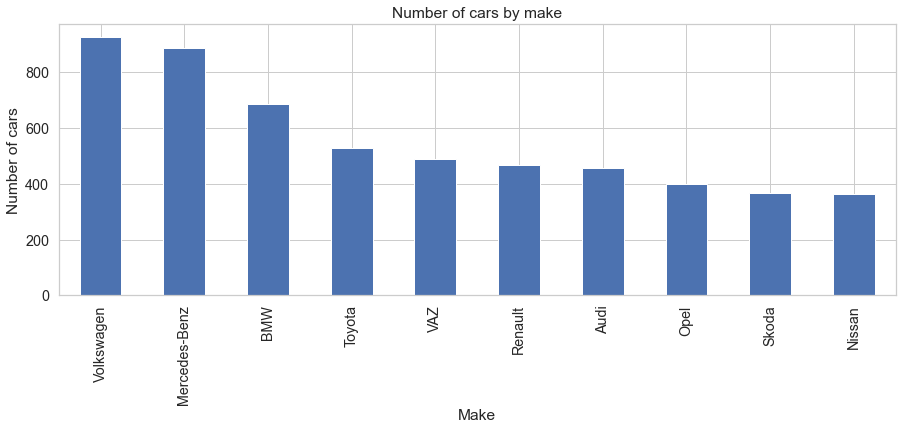

In [40]:
cs_df.car.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

## Car-Body Type Bar Chart

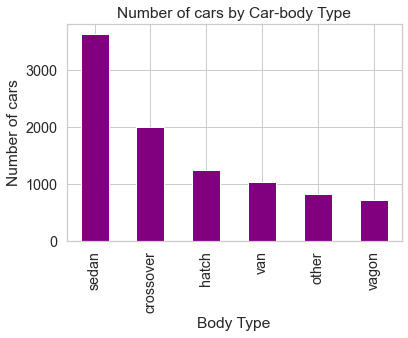

In [44]:
cs_df.body.value_counts().plot(kind='bar', color='purple')
plt.title("Number of cars by Car-body Type")
plt.ylabel('Number of cars')
plt.xlabel('Body Type');

**Sedan** emerges as the major car-body type in the car sales

Text(0.5, 1.0, 'Pie chart showing the proportion of each Fuel_Type value')

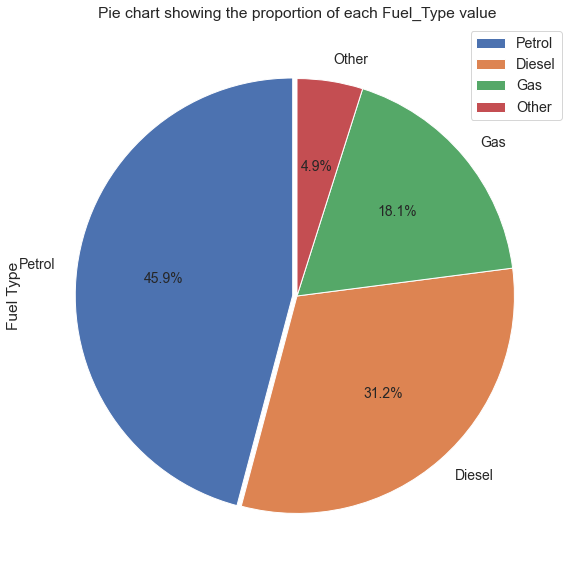

In [45]:
cs_df['engType'].value_counts().plot(kind='pie', explode=[0.02,0.0,0.0,0.0], fontsize=14, autopct='%3.1f%%', figsize=(10,10), shadow=False, startangle=90, legend=True)
plt.ylabel('Fuel Type')
plt.title('Pie chart showing the proportion of each Fuel_Type value')

**Petrol** fuel has the highest share of 45.9% followed by Diesel 31.2% and Gas 18.1%

## Top 10 models by number of sales

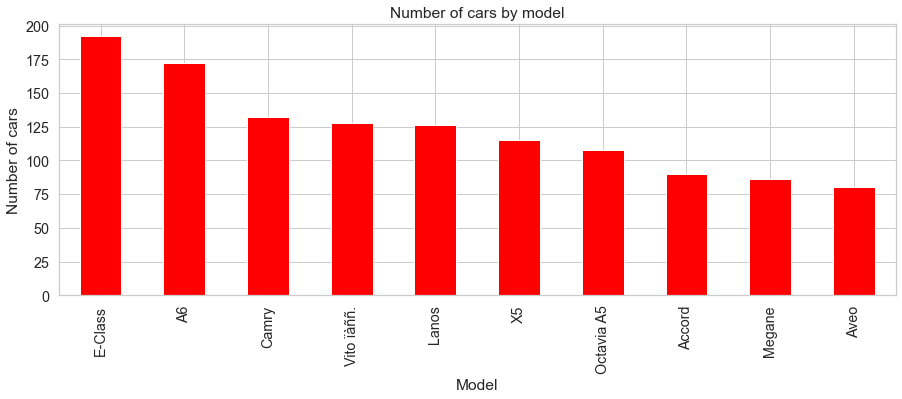

In [55]:
cs_df.model.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5), color='red')
plt.title("Number of cars by model")
plt.ylabel('Number of cars')
plt.xlabel('Model');

**E-Class** model of Mercedes Benz emerged as the most frequently bought model

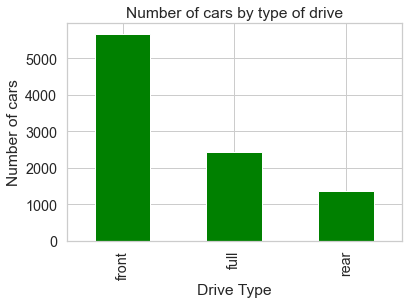

In [46]:
cs_df.drive.value_counts().plot(kind='bar', color='green')
plt.title("Number of cars by type of drive")
plt.ylabel('Number of cars')
plt.xlabel('Drive Type');

**Front Drive** is the dominant drive type in the cars

## Doing Univariate Analysis on Continuous Variable Column

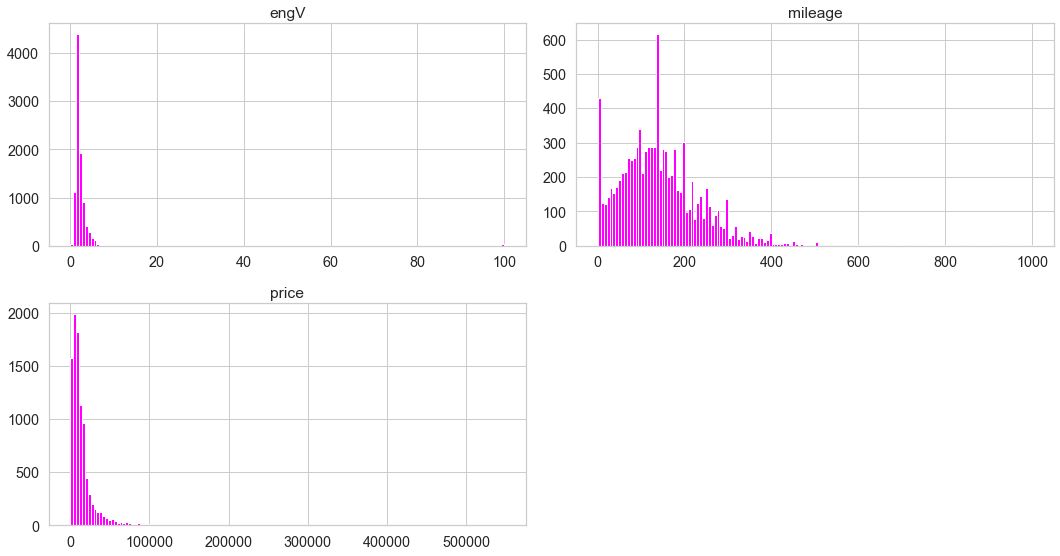

In [75]:
cs_df[['price','mileage','engV']].hist(figsize=(15,8),bins=150,color='magenta')
plt.tight_layout()
plt.show()

**Observations**
- Engine Volume and Price are highly skewed
- Mileage has a near-normal distribution

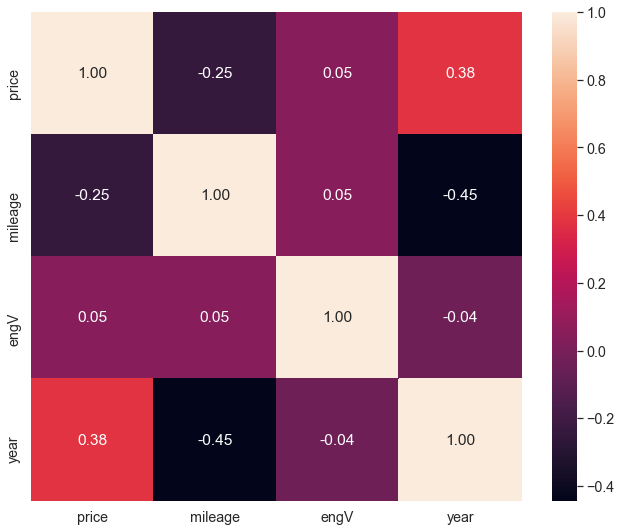

In [126]:
corr = cs_df.corr()
plt.figure(figsize=(11,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

### Findings
- Price is positively correlated with the year
- Mileage is negatively correlated with price and year

## Bivariate Analysis

[(-0.5, 19.5)]

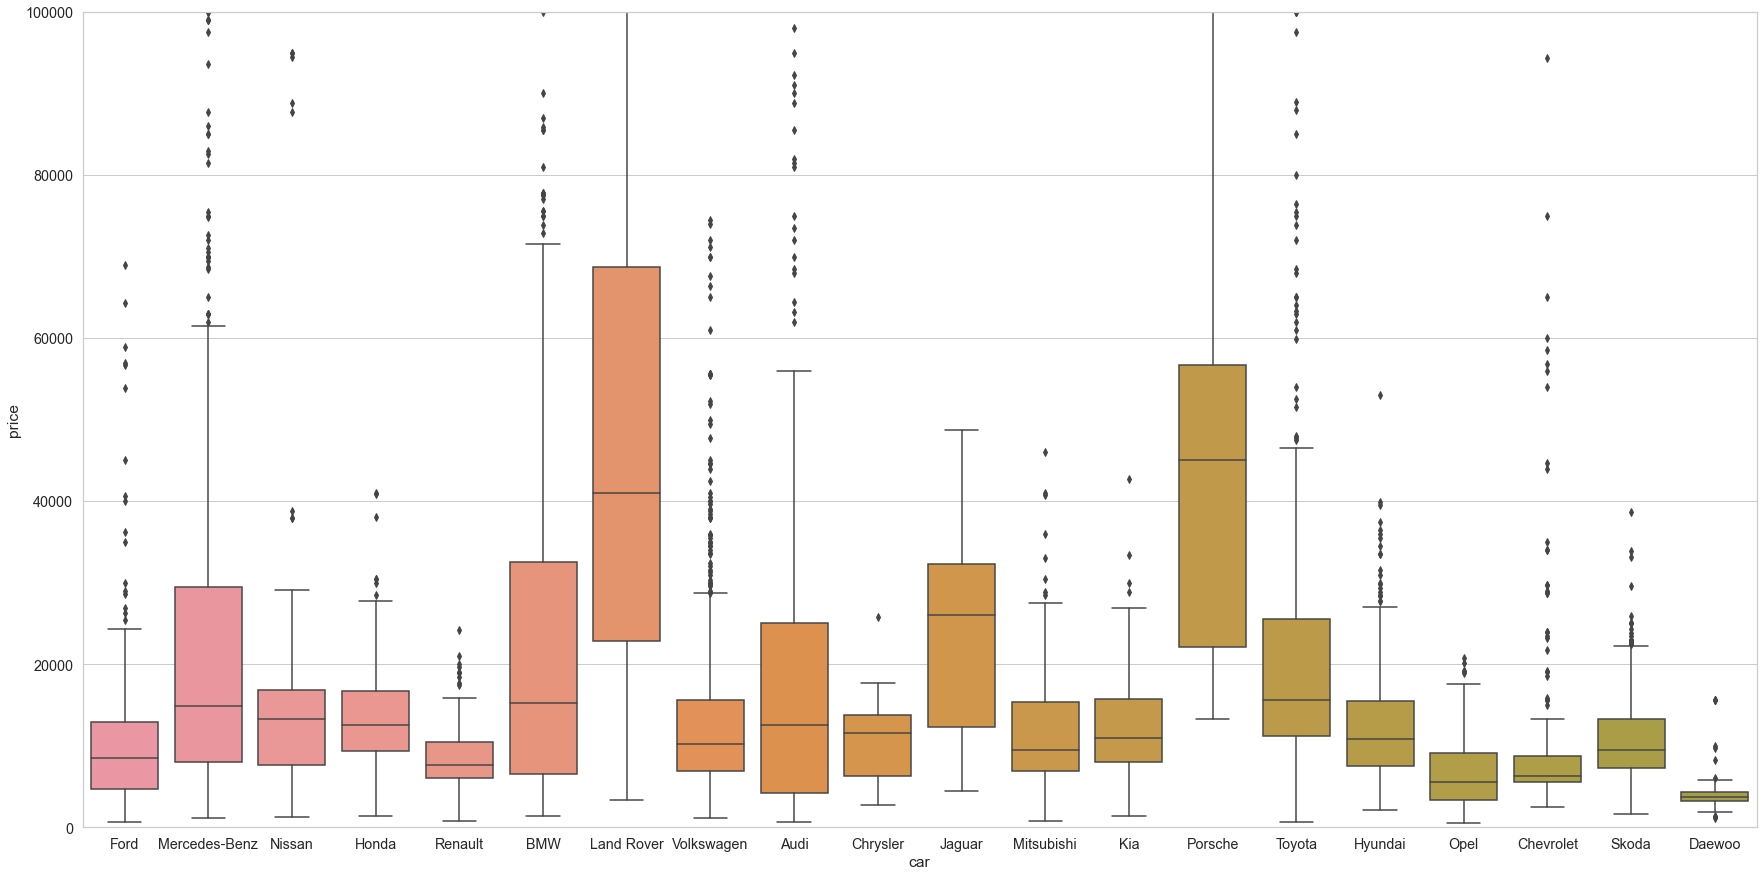

In [108]:
#Price Analysis
plt.rcParams['figure.figsize']=(30,15)
ax = sns.boxplot(x="car", y="price", data=cs_df)
ax.set(ylim=(0, 100000))
ax.set(xlim=(-0.5,19.5))

[(19.5, 39.5)]

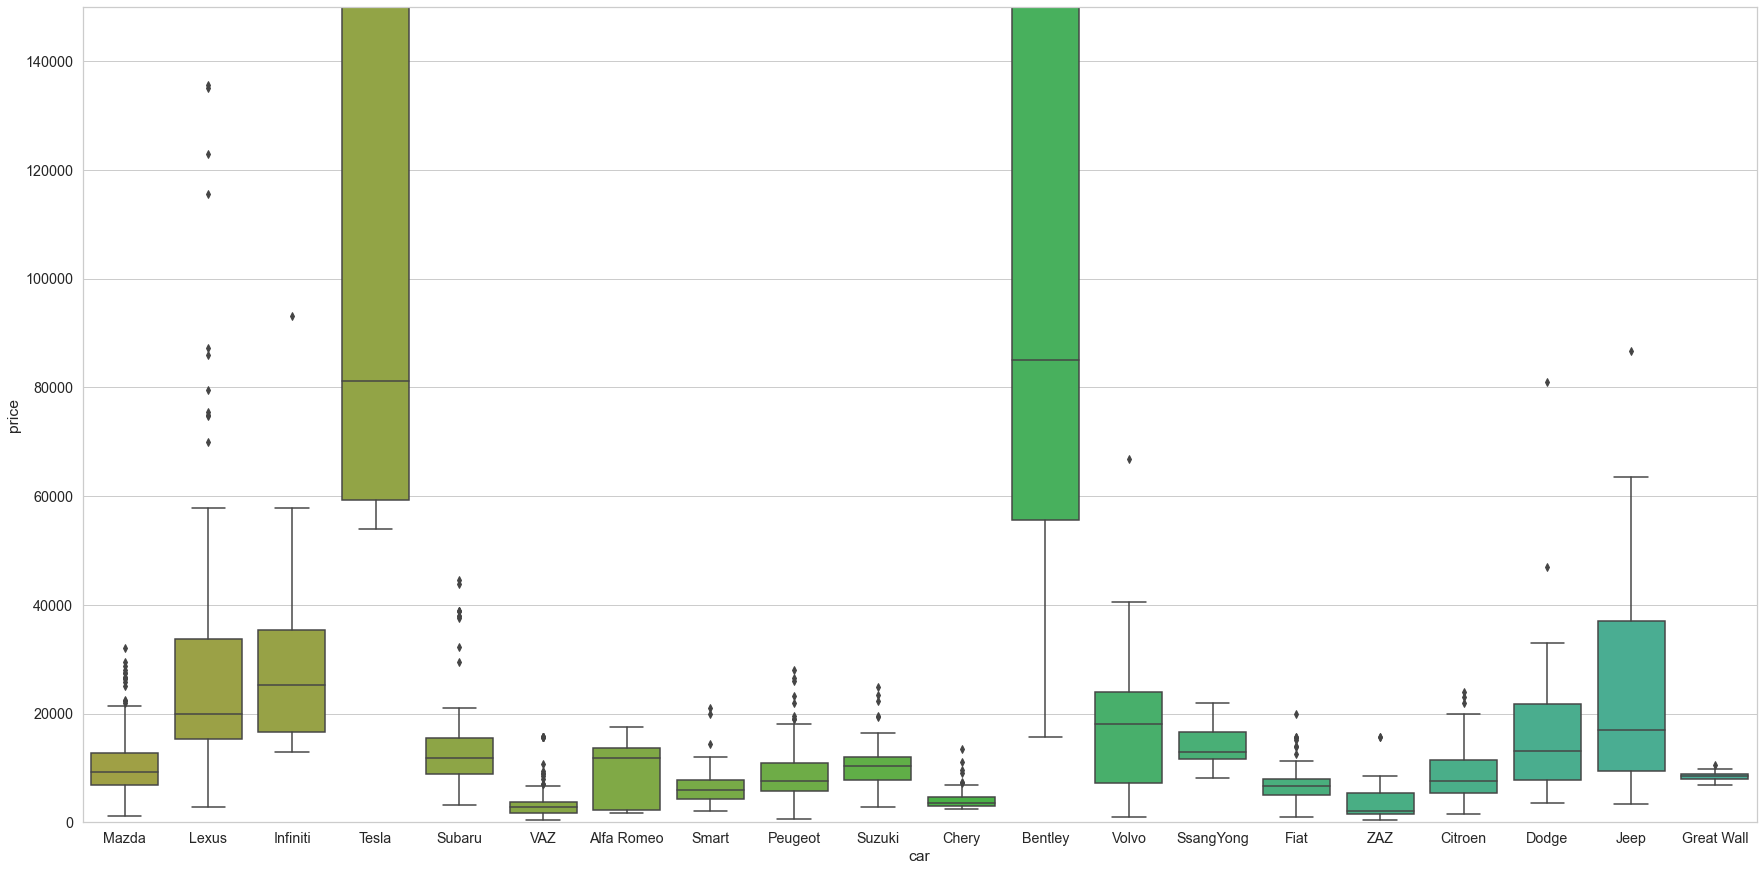

In [110]:
#Price Analysis continued...
plt.rcParams['figure.figsize']=(30,15)
ax = sns.boxplot(x="car", y="price", data=cs_df)
ax.set(ylim=(0, 150000))
ax.set(xlim=(19.5,39.5))

[(39.5, 59.5)]

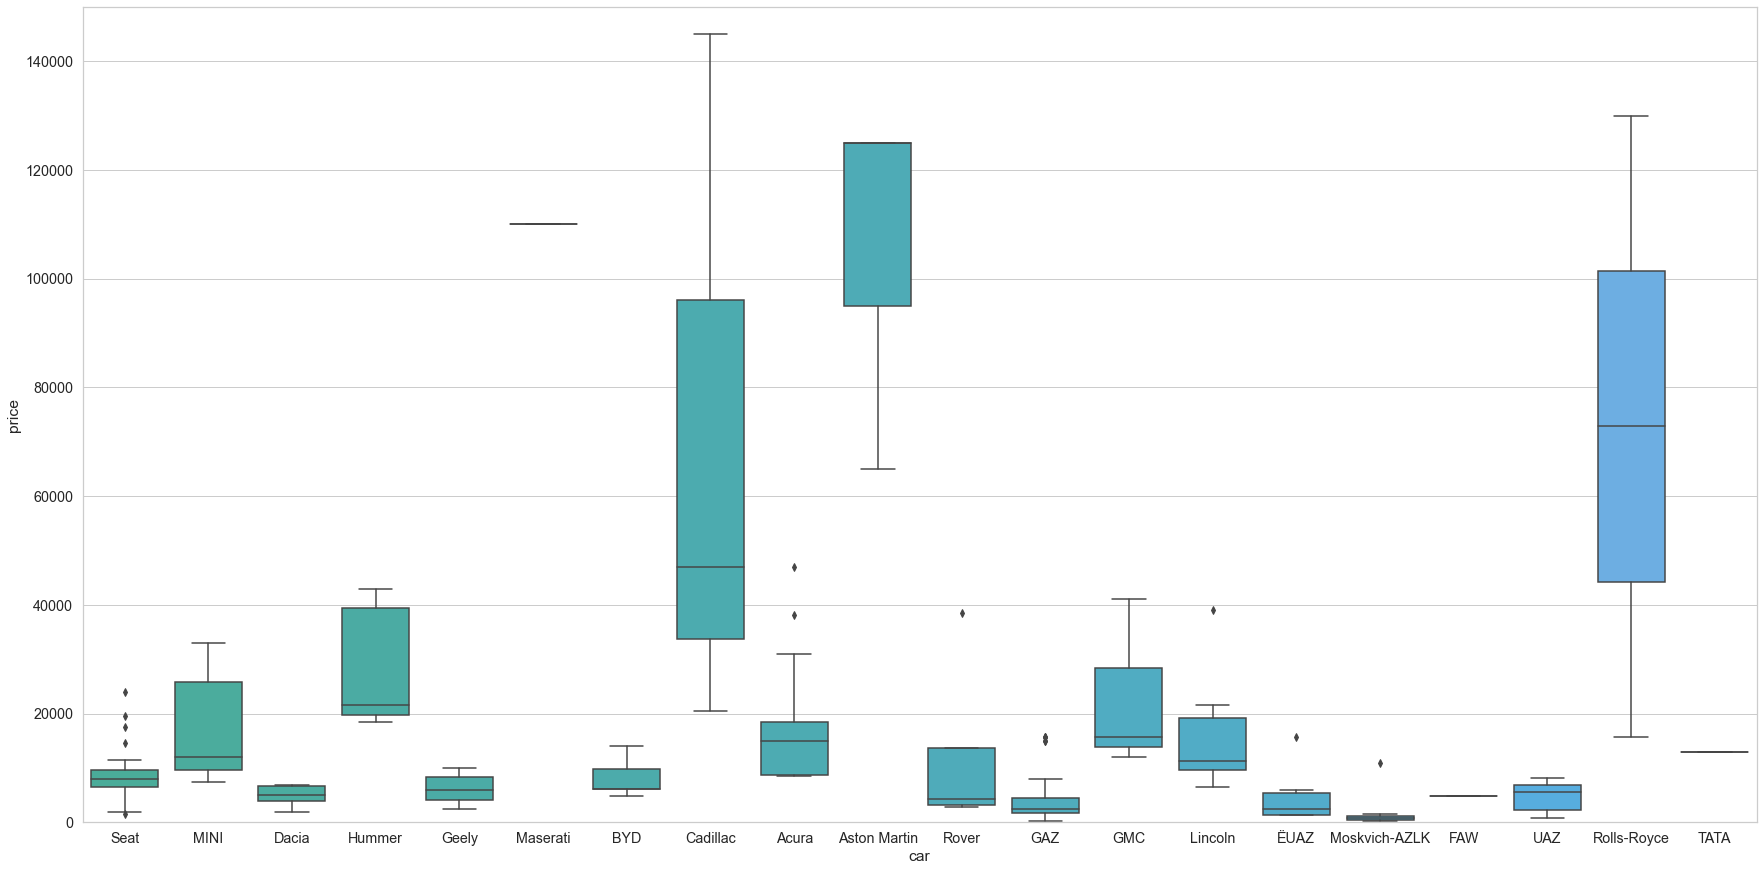

In [111]:
#Price Analysis continued...
plt.rcParams['figure.figsize']=(30,15)
ax = sns.boxplot(x="car", y="price", data=cs_df)
ax.set(ylim=(0, 150000))
ax.set(xlim=(39.5,59.5))

[(59.5, 82.5)]

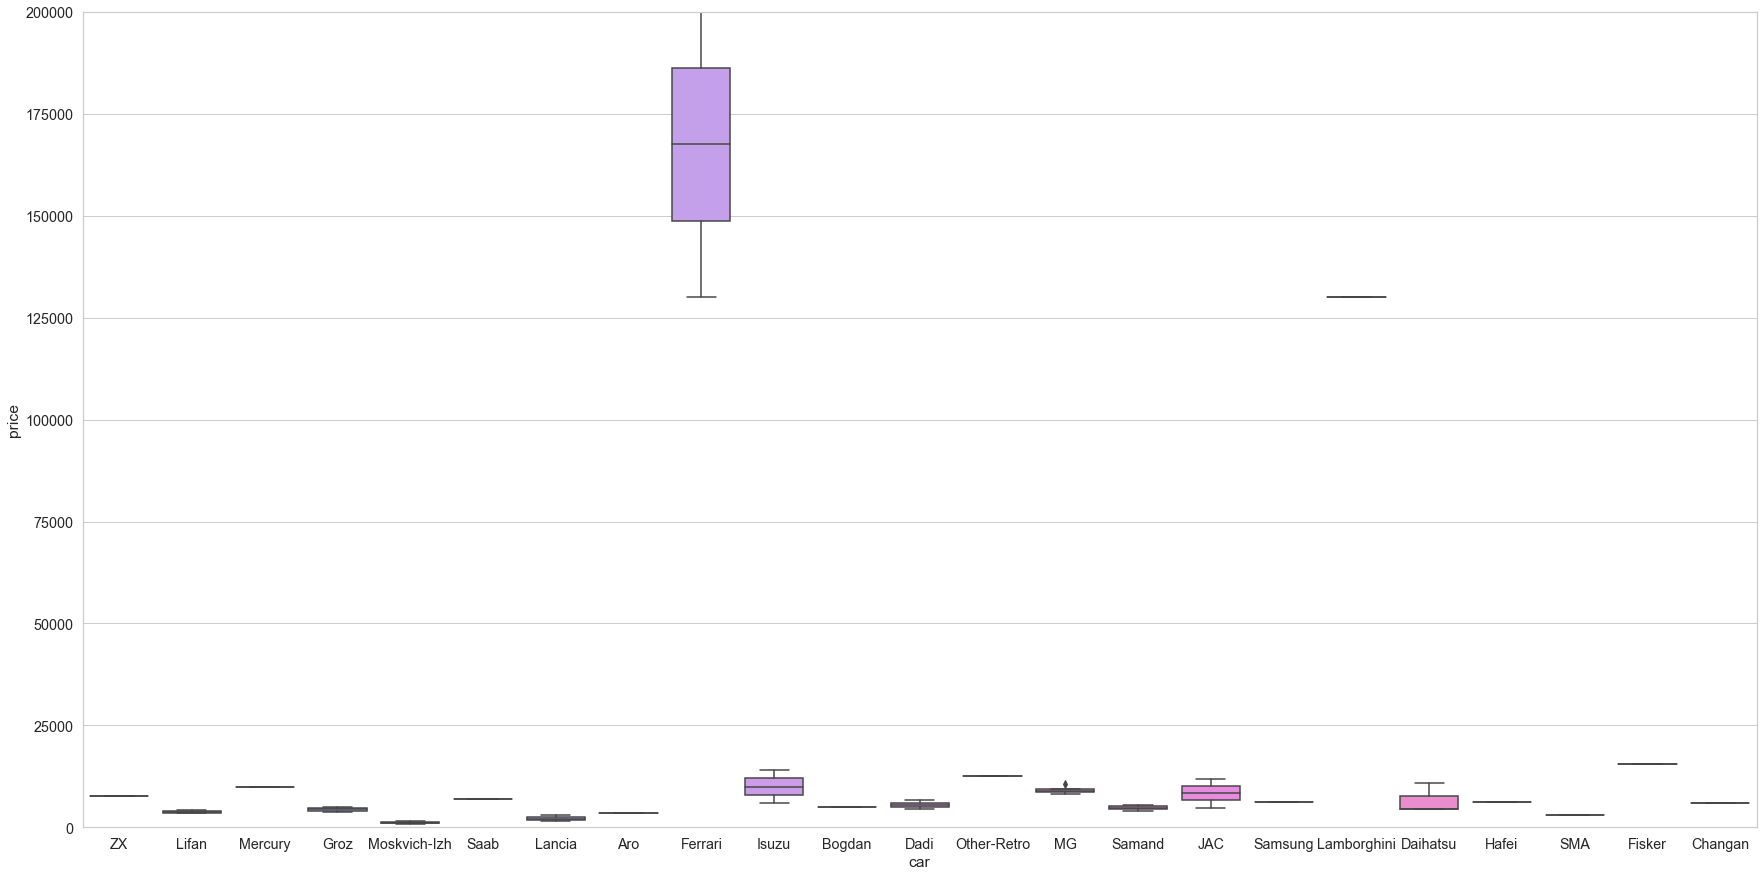

In [123]:
#Price Analysis continued...
plt.rcParams['figure.figsize']=(30,15)
ax = sns.boxplot(x="car", y="price", data=cs_df)
ax.set(ylim=(0, 200000))
ax.set(xlim=(59.5,82.5))

[(0.0, 70000.0)]

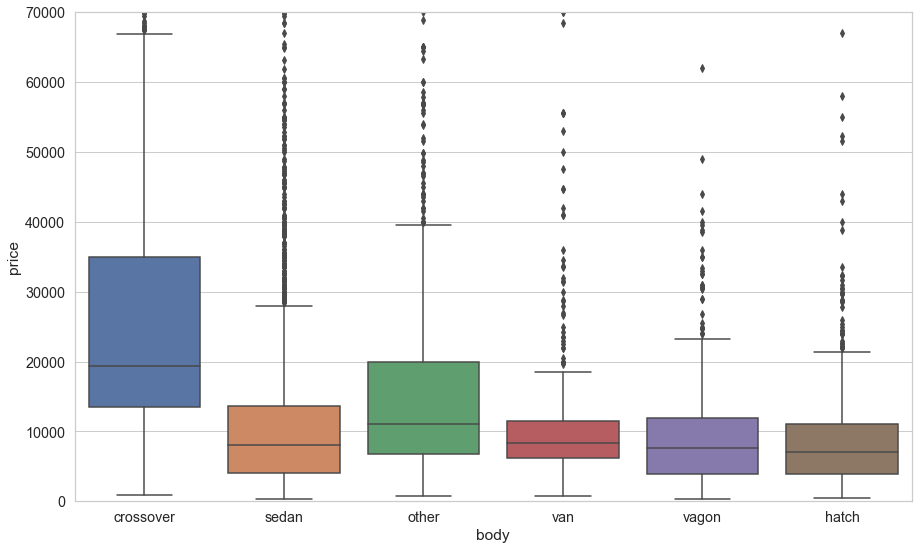

In [101]:
plt.rcParams['figure.figsize']=(15,9)
ax = sns.boxplot(x="body", y="price", data=cs_df)
ax.set(ylim=(0, 70000))

[(0.0, 50000.0)]

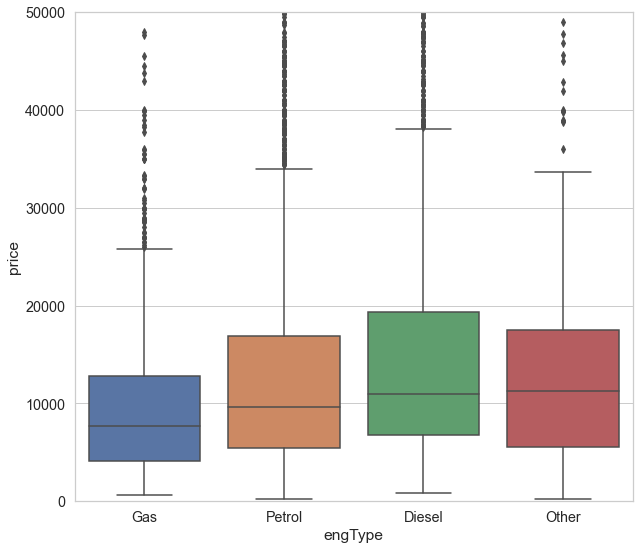

In [100]:
plt.rcParams['figure.figsize']=(10,9)
ax = sns.boxplot(x="engType", y="price", data=cs_df)
ax.set(ylim=(0, 50000))

[(0.0, 80000.0)]

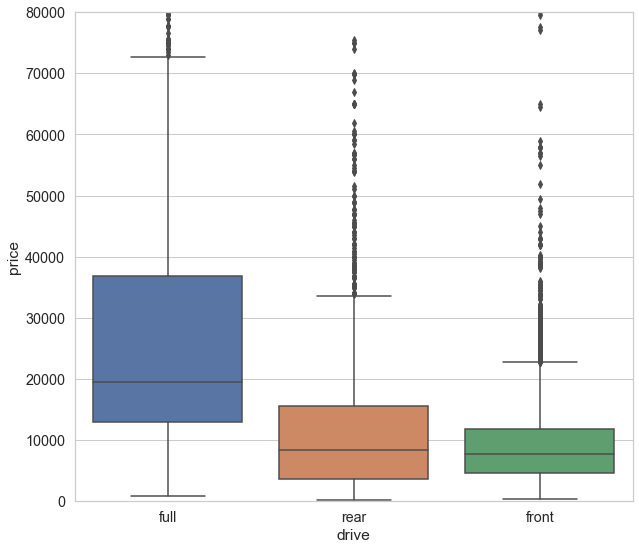

In [99]:
plt.rcParams['figure.figsize']=(10,9)
ax = sns.boxplot(x="drive", y="price", data=cs_df)
ax.set(ylim=(0, 80000))

## Observations

- Ferrari is most expensive car maker with price around 160,000
- Tesla, Bentley, Cadillac, Rolls Royce and Aston Martin are next highest price car makers around 10,000-140,000
- Landrover, Porchse produces cars with prices around 40,000
- Most of the cars comapanies produces car in range below 25000
- Crossovers are expensive followed by sedan, hatch, van and vagon
- Diesel Models are little expensive followed by petrol and gas
- Full drive models occupy the expensive lot compared to rear and front drive-types